In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.optimize import brentq, minimize, minimize_scalar

plt.rcParams['font.family'] = 'SimHei' # 设置中文字体
plt.rcParams['axes.unicode_minus']=False # 坐标轴的负号正常显示
plt.rcParams['figure.constrained_layout.use'] = True # 自动约束布局

In [2]:
df = pd.read_excel('./keypoints(processed).xlsx', index_col=0)
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,736.243000,559.675000,0.650311,830.475000,515.602000,0.626633,836.309000,600.905000,0.620409,912.859000,...,0.745269,715.530000,539.065000,0.703324,736.274000,583.396000,0.082676,715.718000,486.126000,1.025990
1,735.289000,556.763333,0.607014,828.538667,512.640667,0.633446,835.353000,598.949667,0.622196,912.905667,...,0.743171,715.523667,535.203667,0.691652,736.274000,581.374667,0.086199,715.702667,483.253000,1.005325
2,735.110600,553.832200,0.611723,828.740000,509.718400,0.635577,834.620000,596.795400,0.608608,913.499800,...,0.764705,714.988200,532.628600,0.701352,734.516200,579.771200,0.091796,715.698200,481.458600,1.002985
3,735.434571,552.543286,0.636086,827.562429,507.584714,0.633975,834.289286,592.102571,0.602197,914.184143,...,0.761448,715.148000,530.693571,0.717664,734.181857,579.104857,0.083817,715.679714,479.841143,1.003262
4,734.972000,550.213222,0.648676,827.553111,505.100111,0.633372,834.107556,588.507444,0.603854,916.178000,...,0.756769,714.928444,528.642000,0.728304,733.355444,578.068667,0.079145,715.665444,477.639667,1.003326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,697.085000,404.728222,0.440814,807.605778,404.017556,0.676219,812.877444,480.310444,0.642313,890.045444,...,0.760475,682.680111,389.984444,0.529909,703.299667,457.392889,0.276732,692.203556,362.811778,0.805833
920,697.210571,405.427143,0.437540,806.954714,403.276571,0.676322,812.883714,480.310286,0.635842,891.062000,...,0.755481,682.910286,391.105571,0.522153,703.521143,457.592571,0.269673,692.193714,362.925000,0.810678
921,696.859400,402.571800,0.431666,806.951200,403.099200,0.675592,812.881600,480.311600,0.630882,892.306200,...,0.740047,682.154000,388.421200,0.514864,703.945000,457.914200,0.273283,692.195000,363.098800,0.805334
922,697.054000,406.703667,0.422011,806.940000,402.723333,0.668966,812.889333,480.310000,0.627553,893.283333,...,0.735929,682.337000,392.943000,0.501651,705.890000,458.666333,0.255979,692.173333,363.506333,0.836592


In [3]:
df_chain_rod_length = pd.read_excel('./各链杆相对长度.xlsx', header=None)

In [110]:
chain_rod_length = df_chain_rod_length.iloc[:,1].values
chain_rod_length

array([106.85144127,  73.98767791,  69.74996161, 129.41790627,
       128.85113636, 127.24058818, 127.24058818, 303.97666129,
       334.35389959, 154.26114355, 147.05986225, 182.64384696,
       165.5260159 ])

In [111]:
chain_rod_length = chain_rod_length*1.5
chain_rod_length

array([160.27716191, 110.98151686, 104.62494241, 194.12685941,
       193.27670454, 190.86088227, 190.86088227, 455.96499193,
       501.53084938, 231.39171533, 220.58979337, 273.96577044,
       248.28902386])

In [112]:
# 计算关节之间的2d距离
def cal_joints_lenths_2d(df, joints_id):
    joint0xy = df.loc[:,[joints_id[0]*3, joints_id[0]*3+1]]
    joint1xy = df.loc[:,[joints_id[1]*3, joints_id[1]*3+1]]
    lengths_2d = ((joint0xy.values - joint1xy.values)**2).sum(axis=1)**(1/2)
    return lengths_2d

In [113]:
joints_pair = [[0,1],
                [1,2],[1,5],
                [2,3],[5,6],
                [3,4],[6,7],
                [1,8],[1,11],
                [8,9],[11,12],
                [9,10],[12,13],]

In [114]:
ls = []
for i in range(len(joints_pair)):
    ls.append(cal_joints_lenths_2d(df, joints_pair[i]))
joints_length_arr = np.array(ls).T
joints_length_arr.shape

(924, 13)

In [115]:
(joints_length_arr / chain_rod_length)[:,0].max()

0.7592339027294681

In [129]:
s = (joints_length_arr/ chain_rod_length).max(axis=1)
s.shape

(924,)

In [117]:
dZ_unsigned = pd.DataFrame(np.around((chain_rod_length**2 - ((joints_length_arr**2).T / (s**2)).T),10)**(1/2))
dZ_unsigned

C:\Users\86180\AppData\Local\Temp\ipykernel_6092\371520362.py:1: RuntimeWarning: invalid value encountered in sqrt
  dZ_unsigned = pd.DataFrame(np.around((chain_rod_length**2 - ((joints_length_arr**2).T / (s**2)).T),10)**(1/2))


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,86.346927,-0.000000,32.872818,113.224255,101.162378,137.463451,82.673391,240.463748,289.043746,74.845916,4.193318,96.502022,104.809848
1,90.561182,0.000000,42.508204,113.589897,102.061847,137.172251,84.484454,227.612362,247.224377,84.420118,110.362359,123.678579,113.574121
2,91.467630,0.000000,46.625621,116.732455,105.156496,138.801291,89.524559,230.074564,259.522041,90.630378,108.410151,131.860925,113.649048
3,87.651780,0.000000,40.685862,109.342350,93.972008,134.204391,84.024184,203.269867,236.928562,73.230961,97.869079,126.735418,99.027879
4,83.817820,-0.000000,36.436931,104.257962,87.969648,133.478055,78.112431,189.321167,229.284467,65.088640,90.987518,126.711838,88.808540
...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,46.464492,32.425642,18.371214,89.864150,79.957071,152.514908,93.577017,222.477505,262.500706,78.620208,0.000000,95.058058,91.781312
920,55.209475,33.160757,27.843594,92.262431,85.530374,153.951796,97.445981,233.212626,273.518918,72.813574,-0.000000,106.420532,98.698493
921,42.076935,21.970328,9.831226,81.688584,78.151664,151.054313,92.047379,213.576612,244.586433,39.292511,0.000000,94.929922,89.648405
922,43.256277,19.722135,0.000000,80.152371,78.949781,148.946384,93.141258,209.948760,232.277304,17.168084,39.767514,105.632818,98.178710


In [118]:
dZ_sign = pd.read_excel('dZ方向.xlsx')

In [119]:
dZ = pd.DataFrame(dZ_unsigned.values * dZ_sign.values)

In [120]:
dZ

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,86.346927,-0.000000,32.872818,113.224255,-101.162378,137.463451,82.673391,-240.463748,-289.043746,74.845916,4.193318,-96.502022,-104.809848
1,90.561182,0.000000,42.508204,113.589897,-102.061847,137.172251,84.484454,-227.612362,-247.224377,84.420118,110.362359,-123.678579,-113.574121
2,91.467630,0.000000,46.625621,116.732455,-105.156496,138.801291,89.524559,-230.074564,-259.522041,90.630378,108.410151,-131.860925,-113.649048
3,87.651780,0.000000,40.685862,109.342350,-93.972008,134.204391,84.024184,-203.269867,-236.928562,73.230961,97.869079,-126.735418,-99.027879
4,83.817820,-0.000000,36.436931,104.257962,-87.969648,133.478055,78.112431,-189.321167,-229.284467,65.088640,90.987518,-126.711838,-88.808540
...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,46.464492,32.425642,18.371214,89.864150,-79.957071,152.514908,93.577017,-222.477505,-262.500706,78.620208,0.000000,-95.058058,-91.781312
920,55.209475,33.160757,27.843594,92.262431,-85.530374,153.951796,97.445981,-233.212626,-273.518918,72.813574,-0.000000,-106.420532,-98.698493
921,42.076935,21.970328,9.831226,81.688584,-78.151664,151.054313,92.047379,-213.576612,-244.586433,39.292511,0.000000,-94.929922,-89.648405
922,43.256277,19.722135,0.000000,80.152371,-78.949781,148.946384,93.141258,-209.948760,-232.277304,17.168084,39.767514,-105.632818,-98.178710


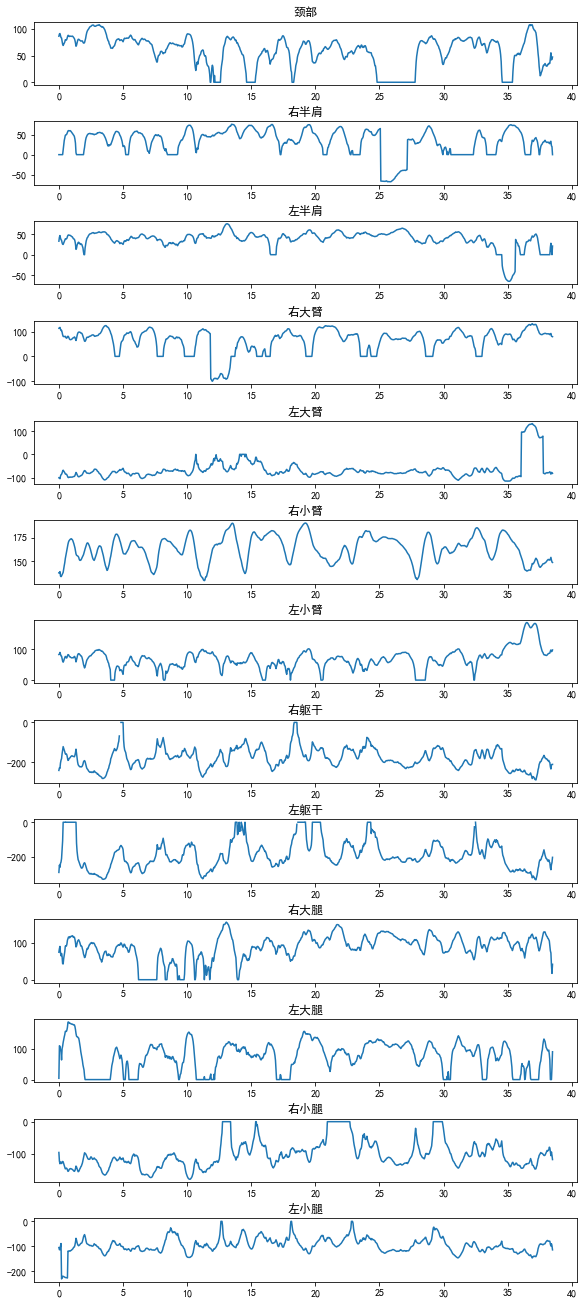

In [121]:
fig, axes = plt.subplots(13,1, figsize=(8,18))
chain_rod_columns = ['颈部','右半肩','左半肩','右大臂','左大臂','右小臂','左小臂','右躯干','左躯干','右大腿','左大腿','右小腿','左小腿']
for i in range(13):
    axes[i].set_title(chain_rod_columns[i])
    axes[i%13].plot(np.linspace(0,38.5,924),dZ.iloc[:,i])
plt.show()

In [122]:
# s_for_neck = (joints_length_arr/ chain_rod_length)[:,[1,2]].mean(axis=1)
# Z0 = 1 / s_for_neck

Z0 = 1 / s

In [123]:
Z_add_path = {'0':(0,),
        '2':(1,),
        '3':(1,3),
        '4':(1,3,5),
        '5':(2,),
        '6':(2,4),
        '7':(2,4,6),
        '8':(7,),
        '9':(7,9),
        '10':(7,9,11),
        '11':(8,),
        '12':(8,10),
        '13':(8,10,12),
        }

In [124]:
Z = np.zeros((924,14))
Z[:,1] = Z0

In [125]:
for key in Z_add_path:
    Z[:,int(key)] = dZ.iloc[:,list(Z_add_path[key])].sum(axis=1)

In [126]:
X = ((df.iloc[:,[3*i for i in range(14)]].T / s).T).values
X

array([[ 955.63976775, 1077.95243707, 1085.52494017, ..., 1479.09131652,
        1693.05282015, 1910.71360966],
       [ 942.54750116, 1062.08177993, 1070.81689341, ..., 1488.39616678,
        1674.54556694, 1888.30224988],
       [ 934.78553076, 1053.84708201, 1061.32424112, ..., 1473.00797475,
        1660.15312891, 1874.95359878],
       ...,
       [ 978.92712487, 1133.58077415, 1141.91162169, ..., 1563.5651138 ,
        1775.2695601 , 2002.76362032],
       [ 978.33796986, 1132.56654635, 1140.91662927, ..., 1569.06984416,
        1777.03126035, 2001.53096827],
       [ 976.20711385, 1123.77748333, 1132.04825343, ..., 1574.63541872,
        1767.34617245, 1984.67844754]])

In [127]:
Y = ((df.iloc[:,[3*i+1 for i in range(14)]].T / s).T).values
Y

array([[726.45537821, 669.24884248, 779.97171401, ..., 585.1387634 ,
        531.63410955, 474.30945627],
       [713.70017581, 657.14049763, 767.77771956, ..., 564.03118696,
        521.27130455, 465.98623594],
       [704.2672586 , 648.17101683, 758.90036784, ..., 556.05343387,
        512.65081416, 461.73822738],
       ...,
       [565.52075602, 566.26163168, 674.72728879, ..., 483.65329356,
        421.67681129, 378.5832463 ],
       [570.82182956, 565.23530221, 674.13071341, ..., 481.29891015,
        419.4082715 , 379.30513628],
       [599.09676247, 558.18158726, 668.85449021, ..., 472.0132256 ,
        414.81693013, 377.6409396 ]])

In [87]:
pd.DataFrame(X).to_excel('X.xlsx')
pd.DataFrame(Y).to_excel('Y.xlsx')
pd.DataFrame(Z).to_excel('Z.xlsx')

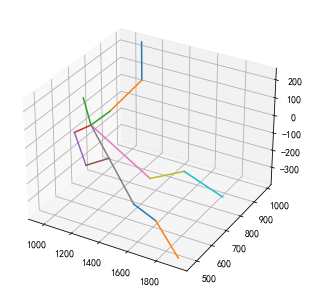

In [128]:
def line_plot(i,X,Y,Z, joints):
    plt.plot([X[i,joints[0]], X[i,joints[1]]], [Y[i,joints[0]], Y[i,joints[1]]], [Z[i,joints[0]], Z[i,joints[1]]])
def skeleton(i,X,Y,Z):
    plt.subplot(projection='3d')
    line_plot(i,X,Y,Z, [4,3])
    line_plot(i,X,Y,Z, [3,2])
    line_plot(i,X,Y,Z, [2,1])
    line_plot(i,X,Y,Z, [1,5])
    line_plot(i,X,Y,Z, [5,6])
    line_plot(i,X,Y,Z, [6,7])
    line_plot(i,X,Y,Z, [1,8])
    line_plot(i,X,Y,Z, [1,11])
    line_plot(i,X,Y,Z, [8,9])
    line_plot(i,X,Y,Z, [9,10])
    line_plot(i,X,Y,Z, [11,12])
    line_plot(i,X,Y,Z, [12,13])
    line_plot(i,X,Y,Z, [0,1])
    # plt.xlim((0,1920))
    # plt.ylim((0,1080))
    ax = plt.gca()
    ax.set_aspect('auto')        
    
    
    #plt.savefig('3d_reconstruction.svg', dpi=200)
    # plt.suptitle('各链杆长度随帧数变化图')
    plt.show()

skeleton(0,X,Y,Z)

In [ ]:
def line_plot(i,X,Y,Z, joints):
    plt.plot([X[i,joints[0]], X[i,joints[1]]], [Y[i,joints[0]], Y[i,joints[1]]], [Z[i,joints[0]], Z[i,joints[1]]])
def skeleton(i,X,Y,Z):
    plt.subplot(projection='3d')
    line_plot(i,X,Y,Z, [4,3])
    line_plot(i,X,Y,Z, [3,2])
    line_plot(i,X,Y,Z, [2,1])
    line_plot(i,X,Y,Z, [1,5])
    line_plot(i,X,Y,Z, [5,6])
    line_plot(i,X,Y,Z, [6,7])
    line_plot(i,X,Y,Z, [1,8])
    line_plot(i,X,Y,Z, [1,11])
    line_plot(i,X,Y,Z, [8,9])
    line_plot(i,X,Y,Z, [9,10])
    line_plot(i,X,Y,Z, [11,12])
    line_plot(i,X,Y,Z, [12,13])
    line_plot(i,X,Y,Z, [0,1])
    # plt.xlim((0,1920))
    # plt.ylim((0,1080))
    ax = plt.gca()
    ax.set_aspect('auto')        
    
    
    #plt.savefig('3d_reconstruction.svg', dpi=200)
    # plt.suptitle('各链杆长度随帧数变化图')
    plt.show()

skeleton(0,X,Y,Z)

In [89]:
Ax = (X[:,4].T / s).T
Ay = (Y[:,4].T / s).T
Az = (Z[:,4].T / s).T

Ax = Ax - Ax[0]
Ay = Ay - Ay[0]
Az = Az - Az[0]

In [90]:
Ax = X[:,4] - X[:,4][0]
Ay = Y[:,4] - X[:,4][0]
Az = Z[:,4] - X[:,4][0]

In [91]:
Ax

array([  0.        , -14.12729777, -23.45444695,   1.70027897,
        14.78210211,  17.60274707,  38.75063636,  58.91751805,
        68.29221748,  63.42814546,  57.72519083,  52.07347724,
        42.55126302,  47.29191631,  55.52664747,  54.2182514 ,
        43.6247505 ,  36.17823574,  40.7008104 ,  51.60867322,
        60.17733686,  62.2064426 ,  69.10374491,  72.09404968,
        75.57689173,  74.89331895,  75.24206999,  77.103259  ,
        73.53902091,  70.20845307,  76.85725927,  89.2236572 ,
       103.67583747,  85.63731641,  61.29415832,  40.89633689,
        25.77799154,  17.67522041,  16.65208646,  17.22127507,
        21.31121379,  25.99921853,  27.50262261,  35.01493327,
        47.29632151,  62.79492717,  81.81948148,  95.22851034,
       107.36952721, 108.68069937, 103.47073248,  95.67204597,
        90.18140861,  89.06450237,  91.73295755,  89.90192194,
        90.56532187,  90.3311718 ,  92.47210423,  97.79665907,
       104.09459757, 104.16621389, 107.04209647, 110.64

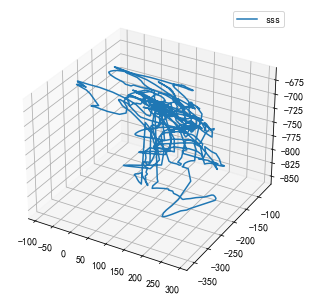

In [92]:
step = 924
start = 0
end = start + step
ax = plt.figure().add_subplot(projection='3d')
ax.plot(Ax[start:end], Ay[start:end], Az[start:end], label='sss')
ax.legend()
plt.show()

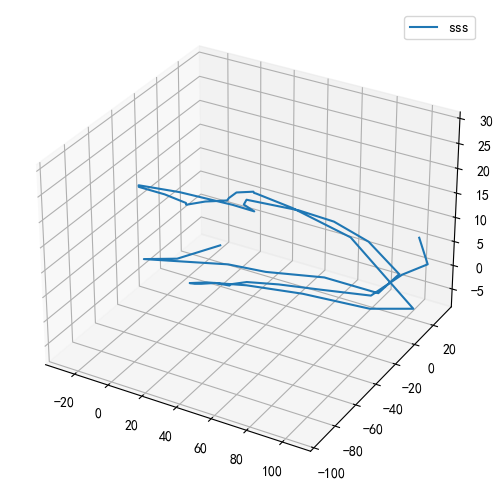

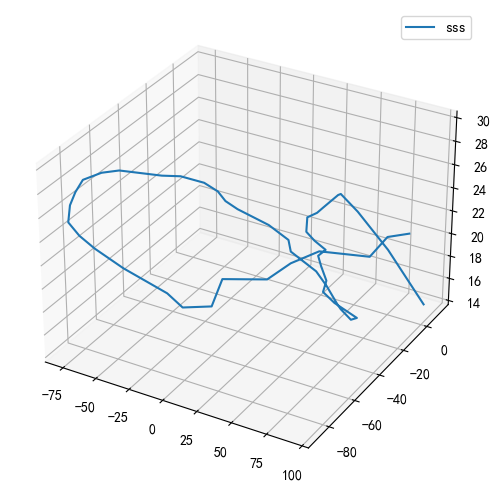

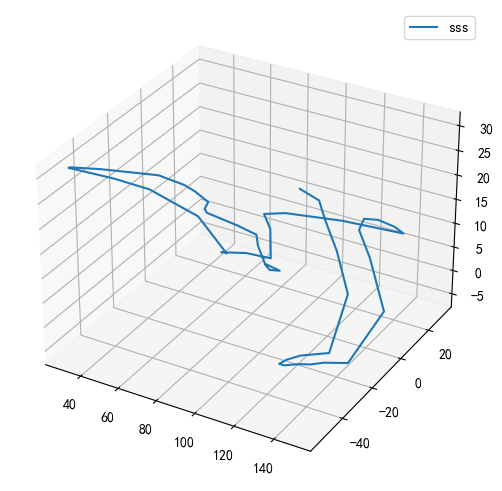

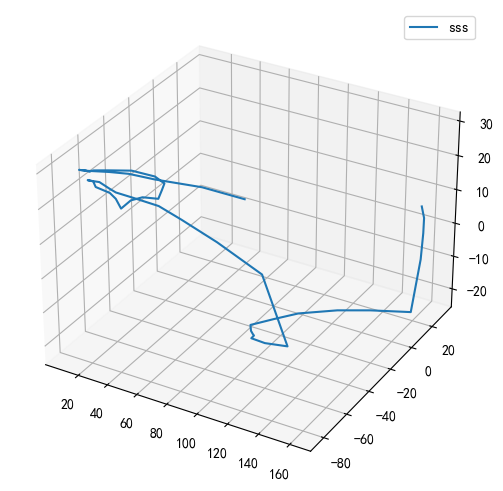

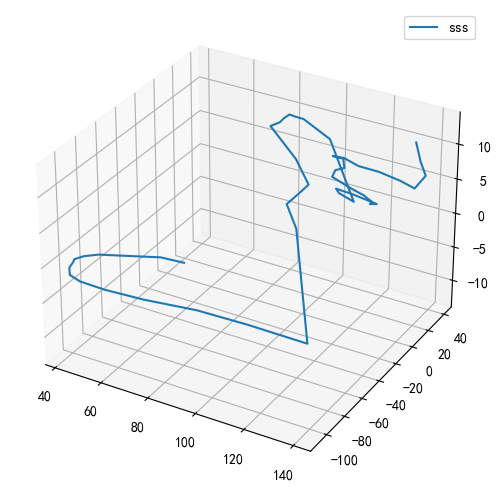

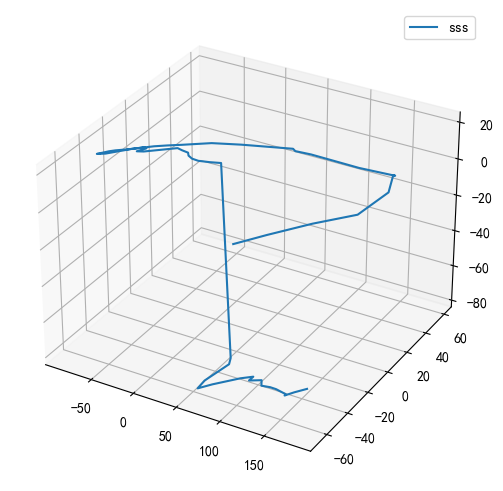

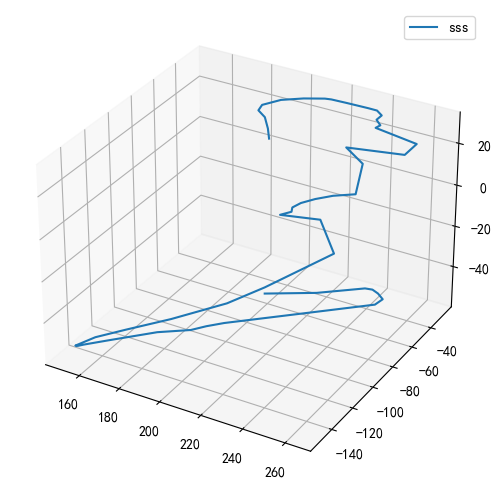

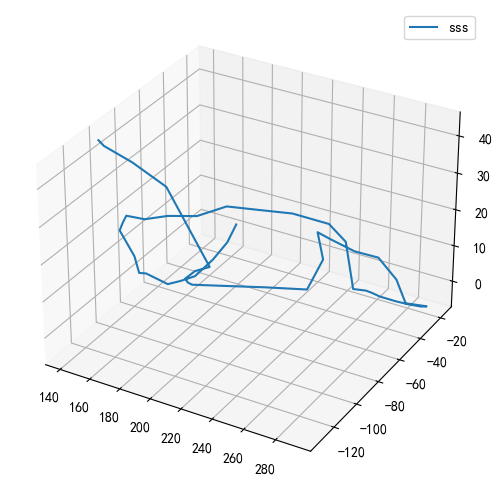

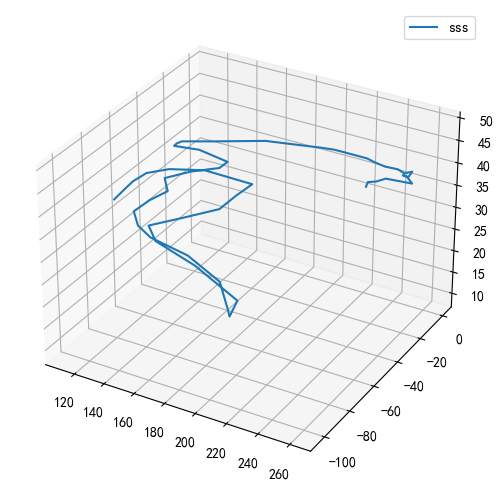

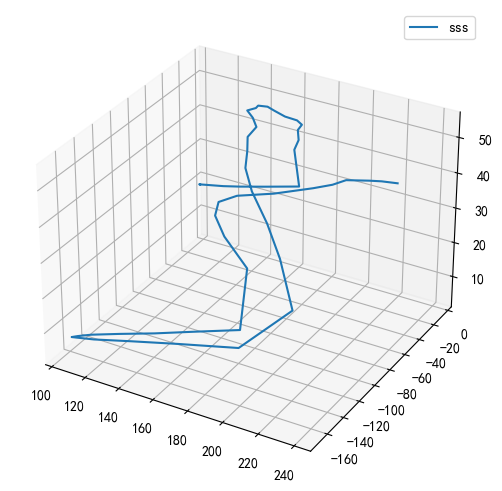

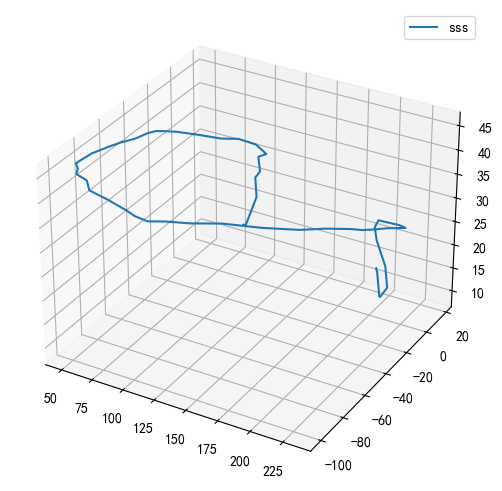

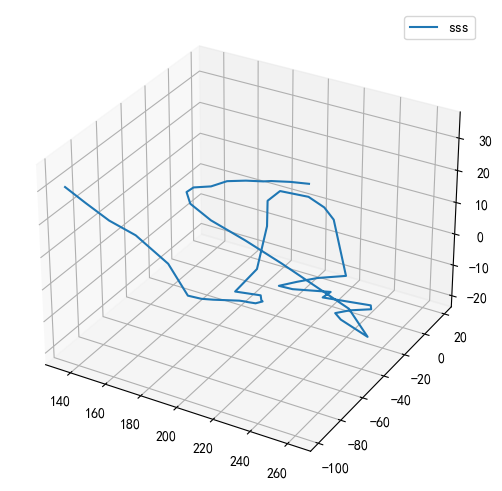

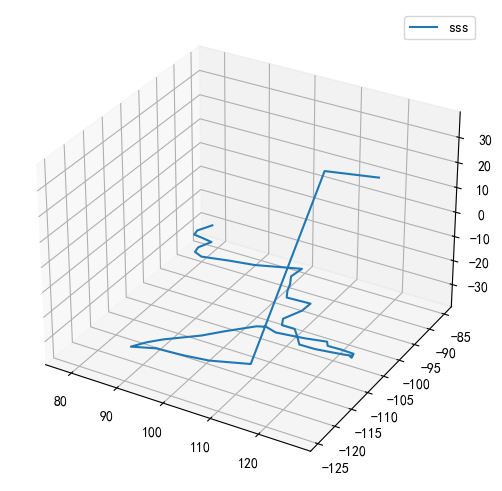

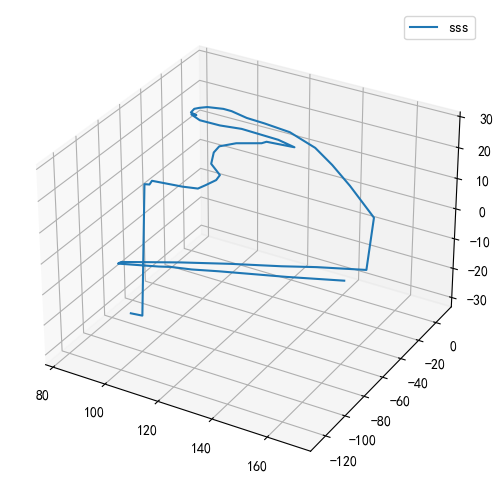

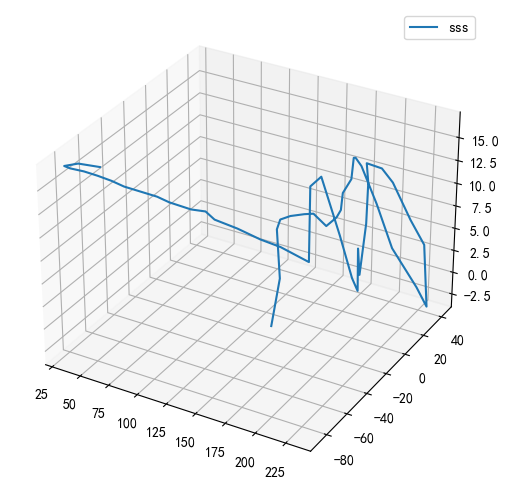

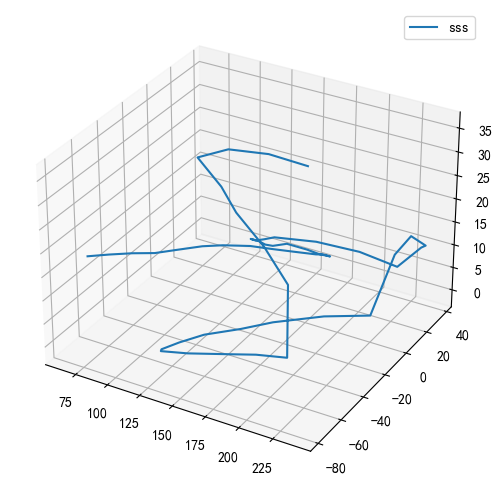

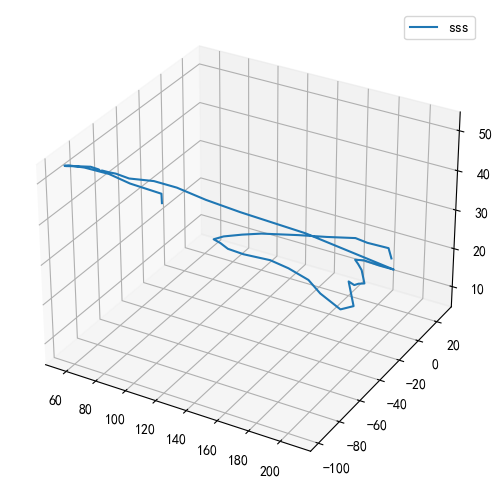

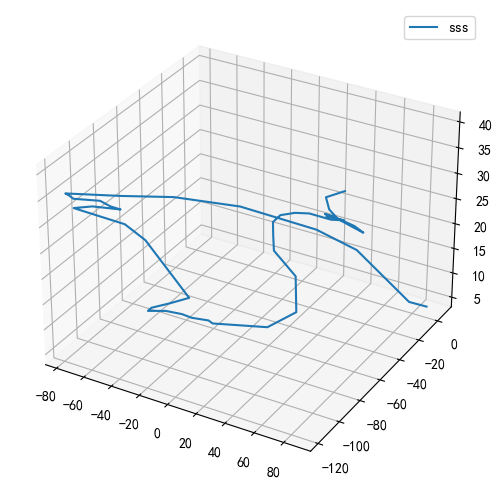

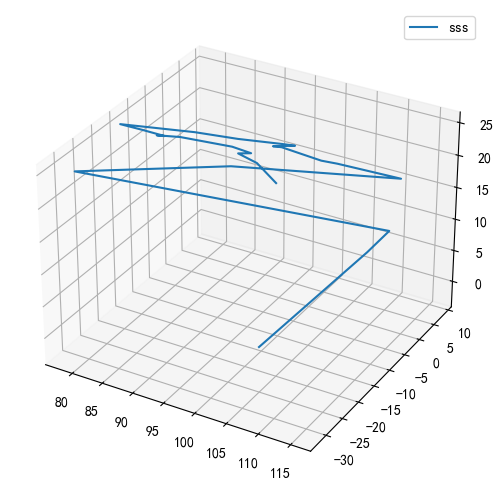

In [33]:
step = 50
for i in np.arange(0,924,step):
    start = i
    end = start + step
    ax = plt.figure().add_subplot(projection='3d')
    ax.plot(Ax[start:end], Ay[start:end], Az[start:end], label='sss')
    ax.legend()
    plt.show()

In [34]:
Ax[900:950]

array([ 90.12818208,  88.37142442,  86.84859954,  89.16100833,
        87.75853521,  82.5419444 ,  80.48718158,  81.95971334,
        80.04728487,  78.23051672,  87.26123335,  92.93885136,
        98.70432129, 100.82581317,  98.89133353, 100.54363064,
       105.46379741, 107.76325447, 115.3428709 ,  96.71298997,
        79.91644027, 114.9733838 , 111.97514242,  99.70117713])